<img src="https://rhyme.com/assets/img/logo-dark.png" align=center></img>
<h2 align="center">Predict Employee Churn with Decision Trees and Random Forests</h2>

In [16]:
cd D:\zzzzzzzzzzzzzzzzzzCoursera proj\Predict Employee turnover

D:\zzzzzzzzzzzzzzzzzzCoursera proj\Predict Employee turnover


### Task 1: Import Libraries
---

In [17]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [18]:
plt.rcParams['figure.figsize'] = (12,8)

### Task 2: Exploratory Data Analysis
---

In [19]:
hr = pd.read_csv('data/employee_data.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
#hr.profile_report()
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


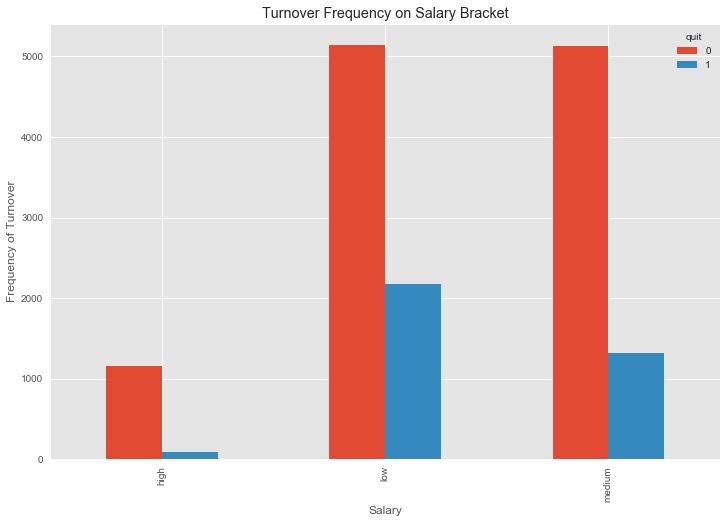

In [21]:
pd.crosstab(hr.salary,hr.quit).plot(kind='bar')
plt.title("Turnover Frequency on Salary Bracket")
plt.xlabel('Salary')
plt.ylabel('Frequency of Turnover')
plt.show()

### Task 3: Encode Categorical Features
---

In [22]:
cat_vars = ['department','salary']
for var in cat_vars:
    cat_list = pd.get_dummies(hr[var],prefix = var)
    hr = hr.join(cat_list)

In [23]:
hr.head() # now we divided the profession and the peopel who belong in it - 1 , 0 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [24]:
hr.drop(columns=['department','salary'] , axis = 1 , inplace = True)

### Task 4: Visualize Class Imbalance
---

In [25]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

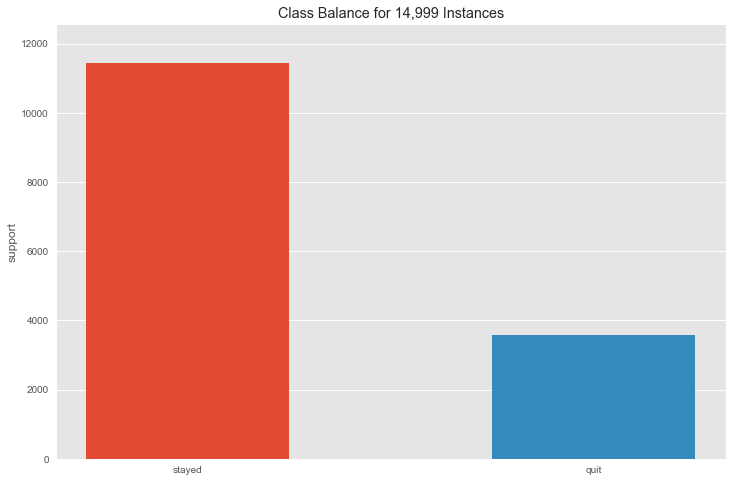

In [26]:
visualizer = ClassBalance(labels=['stayed','quit']).fit(hr.quit)
visualizer.show()

In [27]:
# hence we can notice that there is an imbalance between people who stayed and the ones who left 

### Task 5: Create Training and Test Sets
---

In [53]:
X = hr.loc[:, hr.columns !='quit']
y = hr.quit

In [54]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 0 , test_size = 0.2 , stratify = y)

### Task 6 & 7: Build an Interactive Decision Tree Classifier
---

Supervised learning: 
- The inputs are random variables $X = X_1, ..., X_p$;
- The output is a random variable $Y.$

- Data is a finite set $$\mathbb{L}=\{(x_i,y_i)|i=0, ..., N-1\}$$
where $x_i \in X = X_1 \times ... \times X_p$ and $y_i \in y$ are randomly drawn from $P_{X,Y}.$

E.g., $(x_i,y_i)=((\text{salary = low, department = sales, ...}),\text{quit = 1})$

- The goal is to find a model $\varphi_\mathbb{L}: X \mapsto y$ minimizing $$\text{Err}(\varphi_\mathbb{L}) = \mathbb{E}_{X,Y}\{L(Y, \varphi_\mathbb{L}(X))\}.$$

About:
 
 - Decision trees are non-parametric models which can model arbitrarily complex relations between inputs and outputs, without any a priori assumption
 
- Decision trees handle numeric and categorical variables

- They implement feature selection, making them robust to noisy features (to an extent)

- Robust to outliers or errors in labels

- Easily interpretable by even non-ML practioners.

#### Decision trees: partitioning the feature space:

![partition](assets/images/partition-feature-space.png)

- Decision trees generally have low bias but have high variance.
- We will solve the high variance problem in Task 8.

In [55]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

Decision Tree Training Accuracy : 0.850
Decision Tree Test Accuracy : 0.849


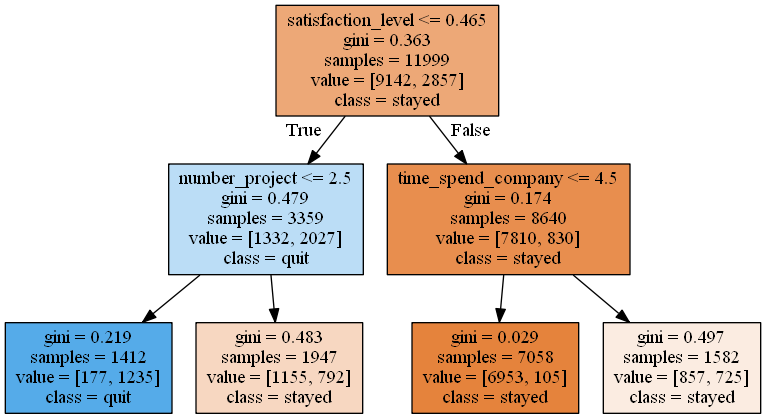

In [58]:
@interact
def plot_tree(crit=['gini','entropy'],
                 split=['best','random'],
                 depth=IntSlider(min=1,max=30,value=2, continuous_update=False), #continuous update is important 
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator = DecisionTreeClassifier(random_state=0,
                                      criterion =crit,
                                      splitter = split,
                                      max_depth= depth,
                                      min_samples_split= min_split,
                                      min_samples_leaf = min_leaf
                                      )
    
    # now fitting it to training data
    estimator.fit(X_train , y_train)
    print('Decision Tree Training Accuracy : {:.3f}'.format(accuracy_score(y_train,estimator.predict(X_train))))
    print('Decision Tree Test Accuracy : {:.3f}'.format(accuracy_score(y_test,estimator.predict(X_test)))) 
    # .3f is upto 3 decimal places 
    graph = Source(tree.export_graphviz(estimator,out_file=None,
                                       feature_names=X_train.columns,
                                       class_names=['stayed','quit'],
                                       filled =True))
    
    display(Image(data = graph.pipe(format = 'png')))

### Task 8: Build an Interactive Random Forest Classifier
---

Although randomization increases bias, it is possible to get a reduction in variance of the ensemble. Random forests are one of the most robust machine learning algorithms for a variety of problems.

- Randomization and averaging lead to a reduction in variance and improve accuracy
- The implementations are parallelizable
- Memory consumption and training time can be reduced by bootstrapping
- Sampling features and not solely sampling examples is crucial to improving accuracy

In [49]:
@interact
def plot_tree_rf(crit=['gini','entropy'],
                 bootstrap=['best','random'],
                 depth=IntSlider(min=1,max=30,value=2, continuous_update=False), #continuous update is important 
                 #forests=IntSlider(min=,max=,value=,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator = DecisionTreeClassifier(random_state=0,
                                      criterion =crit,
                                      splitter = split,
                                      max_depth= depth,
                                      min_samples_split= min_split,
                                      min_samples_leaf = min_leaf
                                      )
    
    # now fitting it to training data
    estimator.fit(X_train , y_train)
    print('Decision Tree Training Accuracy : {:.3f}'.format(accuracy_score(y_train,estimator.predict(X_train))))
    print('Decision Tree Test Accuracy : {:.3f}'.format(accuracy_score(y_train,estimator.predict(X_test))))
    # .3f is upto 3 decimal places 
    graph = Source(tree.export_graphviz(estimator,out_file=None,
                                       feature_names=X_train.columns,
                                       class_names=['stayed','quit'],
                                       filled =True))
    
    display(Image(data = graph.pipe(format = 'png')))

NameError: name 'split' is not defined

### Task 9: Feature Importance and Evaluation Metrics
---

In [ ]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")